# Rwanda Water Quality Prediction

__Goal:__ 

The Omdena Rwanda Chapter’s primary goal in this project is to develop an accurate and efficient machine learning model that can predict water quality based on a range of parameters such as Electrical conductivity of water, Amount of organic carbon in ppm, Amount of Trihalomethanes in μg/L, and turbidity. 

The model will be trained on a Synthetic dataset of historical water quality data and will be designed to provide predictions for water quality.

**Author - Saurabh Bhardwaj**

**Date - 18/06/2023**


# Import Libraries

In [279]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px


# Data Preprocessing

In [280]:
# read the dataset
dataframe = pd.read_csv('Synthetic_Data_Water_Quality.csv')
dataframe.head()

,Colour (TCU),Turbidity (NTU),pH,Conductivity (uS/cm),Total Dissolved Solids (mg/l),Total Hardness (mg/l as CaCO3),Aluminium (mg/l),Chloride (mg/l),Total Iron (mg/l),Sodium (mg/l),Sulphate (mg/l),Zinc (mg/l),Magnesium (mg/l),Calcium (mg/l),Potassium (mg/l),Nitrate (mg/l),Phosphate (mg/l),Potability
0,8.34,3.39,8.06,819.00,787.15,279.89,0.09,129.30,0.22,13.13,81.01,2.24,12.69,107.95,17.50,22.23,0.41,potable
1,14.45,3.36,8.28,1371.10,779.66,112.04,0.20,163.73,0.13,127.48,307.99,4.05,52.01,107.12,45.28,16.06,0.68,potable
2,3.87,4.23,6.86,202.75,485.10,113.17,0.15,66.68,0.29,142.97,16.70,0.86,88.47,127.47,4.90,19.81,0.91,potable
3,14.57,1.75,7.00,696.16,409.71,140.39,0.06,102.42,0.15,194.07,393.09,2.60,61.36,99.16,36.73,42.82,0.02,potable
4,9.01,2.20,6.73,129.24,343.55,6.52,0.07,140.47,0.28,3.77,170.65,0.04,47.22,107.17,44.79,14.35,2.08,potable


In [281]:
# changing the name of the columns for easy readability

# get the columns list
columns = dataframe.columns

# initialise new dict
new_columns = {}

# add first letter of the columns to new dict
for column in columns:
    column_name = column.split()
    if len(column_name) > 2:
        new_columns[column] = column_name[1].lower() # split the columns name and change to lower font
    else:
        new_columns[column] = column_name[0].lower() 
        

# change the dataframe columns names
dataframe = dataframe.rename(columns = new_columns)

# check first five rows
dataframe.head()

,colour,turbidity,ph,conductivity,dissolved,hardness,aluminium,chloride,iron,sodium,sulphate,zinc,magnesium,calcium,potassium,nitrate,phosphate,potability
0,8.34,3.39,8.06,819.00,787.15,279.89,0.09,129.30,0.22,13.13,81.01,2.24,12.69,107.95,17.50,22.23,0.41,potable
1,14.45,3.36,8.28,1371.10,779.66,112.04,0.20,163.73,0.13,127.48,307.99,4.05,52.01,107.12,45.28,16.06,0.68,potable
2,3.87,4.23,6.86,202.75,485.10,113.17,0.15,66.68,0.29,142.97,16.70,0.86,88.47,127.47,4.90,19.81,0.91,potable
3,14.57,1.75,7.00,696.16,409.71,140.39,0.06,102.42,0.15,194.07,393.09,2.60,61.36,99.16,36.73,42.82,0.02,potable
4,9.01,2.20,6.73,129.24,343.55,6.52,0.07,140.47,0.28,3.77,170.65,0.04,47.22,107.17,44.79,14.35,2.08,potable


In [282]:
# check datatype

dataframe.dtypes

colour          float64
turbidity       float64
ph              float64
conductivity    float64
dissolved       float64
hardness        float64
aluminium       float64
chloride        float64
iron            float64
sodium          float64
sulphate        float64
zinc            float64
magnesium       float64
calcium         float64
potassium       float64
nitrate         float64
phosphate       float64
potability       object
dtype: object

### All the data is of float type except target columns 'potability'. 

In [283]:
# check for missing values
dataframe.isna().sum()

colour          0
turbidity       0
ph              0
conductivity    0
dissolved       0
hardness        0
aluminium       0
chloride        0
iron            0
sodium          0
sulphate        0
zinc            0
magnesium       0
calcium         0
potassium       0
nitrate         0
phosphate       0
potability      0
dtype: int64

### Fortunately, there are no missing values present in the dataset.

# EDA

In [284]:
# check the descriptive stastistics
dataframe.describe()

,colour,turbidity,ph,conductivity,dissolved,hardness,aluminium,chloride,iron,sodium,sulphate,zinc,magnesium,calcium,potassium,nitrate,phosphate
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,15.006526,5.003388,7.337763,1502.148272,1001.183584,300.613398,0.200808,249.491721,0.300165,200.793553,402.124054,5.004608,100.026299,149.944522,49.838229,45.162176,2.205561
std,8.717615,2.906118,3.101412,869.812955,578.522848,171.478482,0.115359,144.526095,0.174572,116.039382,230.187867,2.897890,57.979525,87.162086,28.795520,25.861234,1.274395
min,0.010000,0.000000,0.000000,0.120000,0.050000,0.030000,0.000000,0.000000,0.000000,0.010000,0.030000,0.000000,0.030000,0.020000,0.000000,0.030000,0.000000
25%,7.517500,2.490000,6.397500,741.635000,494.590000,154.980000,0.100000,122.707500,0.150000,99.890000,205.910000,2.460000,49.362500,74.417500,24.490000,23.150000,1.090000
50%,15.000000,5.000000,7.470000,1500.095000,1000.030000,300.005000,0.200000,249.915000,0.300000,199.995000,400.125000,5.000000,100.015000,150.010000,49.990000,45.010000,2.200000
75%,22.660000,7.530000,8.480000,2259.740000,1497.880000,448.605000,0.300000,374.760000,0.450000,303.645000,601.925000,7.500000,150.130000,226.245000,75.040000,67.772500,3.320000
max,30.000000,10.000000,14.000000,2999.910000,1999.960000,599.970000,0.400000,499.870000,0.600000,399.980000,799.880000,10.000000,199.980000,299.970000,100.000000,90.000000,4.400000


### 1. Almost all features in the dataset lies on different ranges.
### 2. Features with the least range are - colour, turbidity, ph, aluminium, ti, zinc, and phosphate.
### 3. Features with the largest range are - conductivity, tds, and sulphate

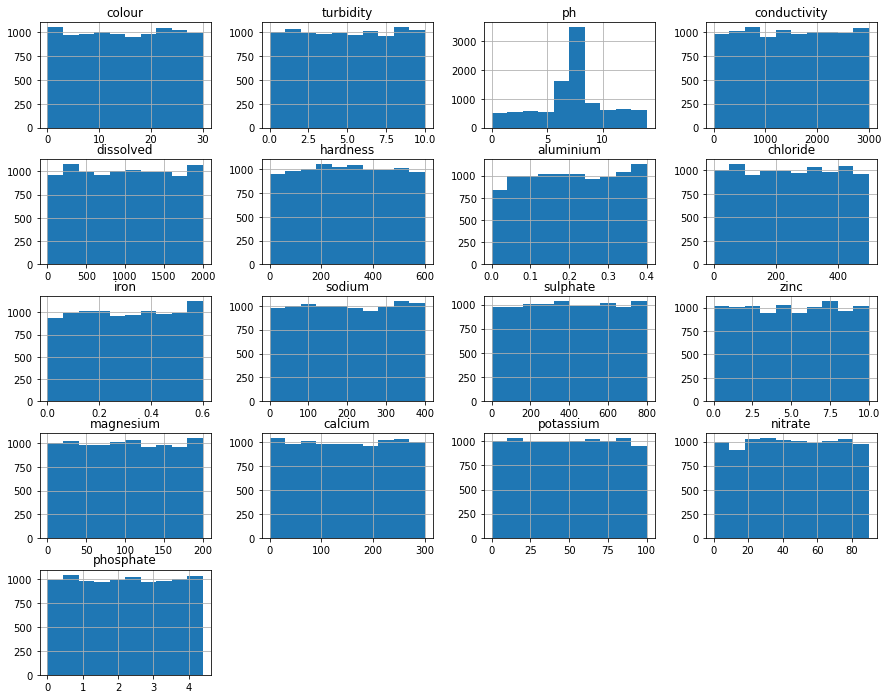

In [285]:
# Check the data distribution
dataframe.hist(figsize=(15, 12))
plt.show()

### Except **Ph value**, all feature are almost shows a uniform distribution. 

In [286]:
# check target feature values count to understand balance or imbalance of the target feature.

dataframe.potability.value_counts()

potable        5000
non-potable    5000
Name: potability, dtype: int64

In [287]:
# # Add random noise to each feature
# for feature in dataframe.columns:
#     if feature != 'potability':
#         mean, std = dataframe[feature].mean(), dataframe[feature].std()
#         noise = np.random.normal(mean, std, len(dataframe[feature]))
#         dataframe[feature] += noise

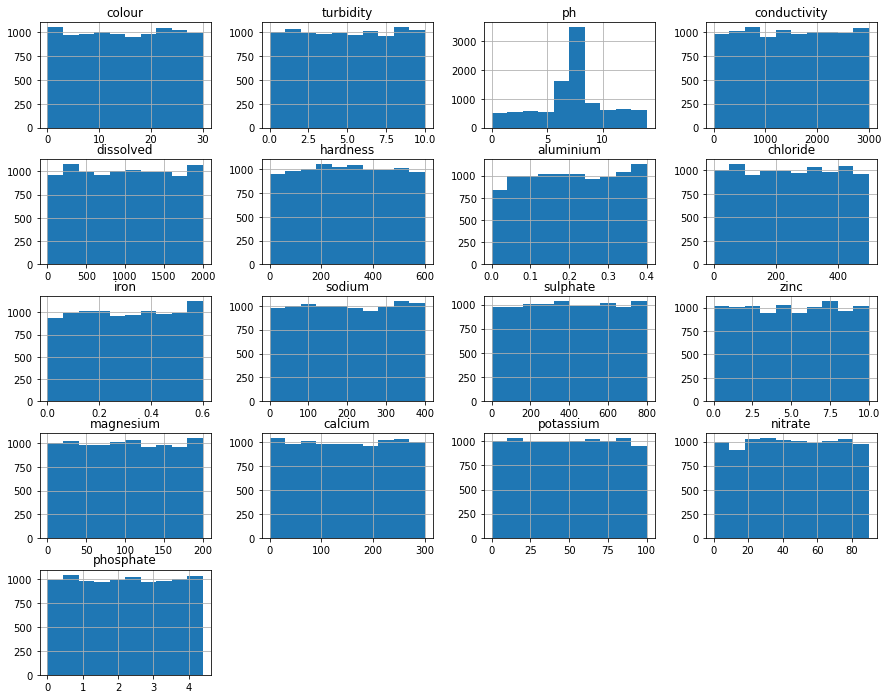

In [288]:
# Check the data distribution
dataframe.hist(figsize=(15, 12))
plt.show()

### Fortunately, the data is perfectly balances. It might be due to the fact that it is Synthetic.

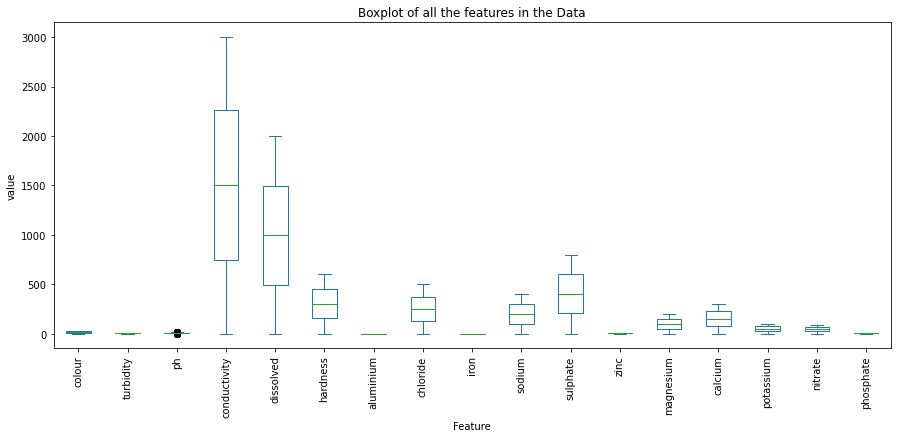

In [289]:
# Investiage the feature for outliers

dataframe.plot(kind = 'box', figsize = (15, 6))
plt.title('Boxplot of all the features in the Data')
plt.xlabel('Feature')
plt.ylabel('value')
plt.xticks(rotation = 90)
plt.show()

### 1. As noticed in descriptive analysis as well, data lies on a different range, which is a indication that feature does not have multi-colinearity and these might be good predictor of target variable.
### 2. The features such as colur, turbidity, ph, aluminimuim, iron, zinc, and nitrate on a smaller range, it can be explored seperately.


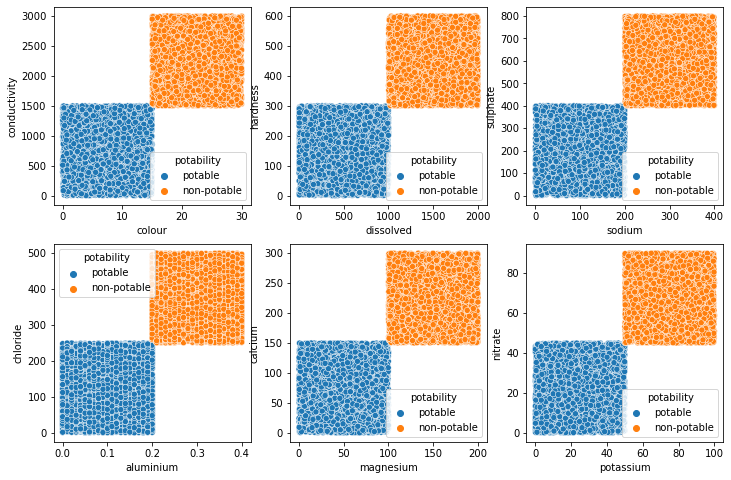

In [290]:
# scatter plot for multivariate analysis

fig, ax = plt.subplots(2, 3, figsize = (12, 8))
sns.scatterplot(data=dataframe, x='colour', y = 'conductivity', hue='potability', ax = ax[0][0])
sns.scatterplot(data=dataframe, x='dissolved', y = 'hardness', hue='potability', ax = ax[0][1])
sns.scatterplot(data=dataframe, x='sodium', y = 'sulphate', hue='potability', ax = ax[0][2])
sns.scatterplot(data=dataframe, x='aluminium', y = 'chloride', hue='potability', ax = ax[1][0])
sns.scatterplot(data=dataframe, x='magnesium', y = 'calcium', hue='potability', ax = ax[1][1])
sns.scatterplot(data=dataframe, x='potassium', y = 'nitrate', hue='potability', ax = ax[1][2])
plt.show()

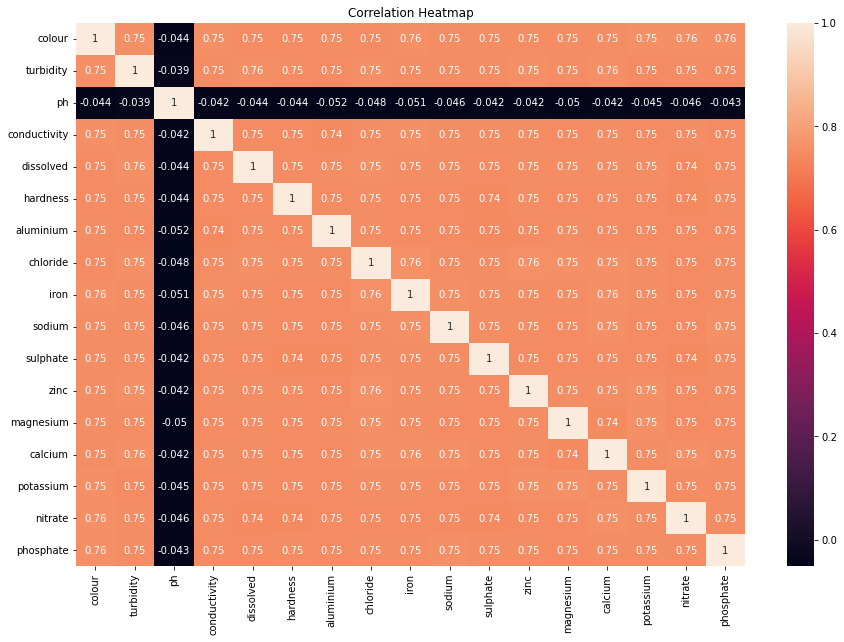

In [291]:
# check the feature correlation 
plt.figure(figsize=(15, 10))
sns.heatmap(data=dataframe.corr(), annot=True)
plt.title('Correlation Heatmap');
plt.show()

# Feature Engineering based on the data provided

Based on the existing features in your dataset, here are some potential new features you can create that may enhance the model performance and are based on real-world understanding:

**Water Clarity:** Combine the features 'colour' and 'turbidity' to create a new feature that represents the overall clarity of the water. 

Weighted Average: water_clarity = (0.7 * colour) + (0.3 * turbidity)

**Water Balance:** This represents the balance of ions in the water. The difference between the two groups of ions can provide insights into the overall ion balance.

water_balance = (sodium + potassium + calcium + magnesium) - (chloride + sulphate + nitrate + phosphate)

**Corrosivity Potential:** Corrosivity is influenced by factors like the pH level, mineral content, and electrical conductivity of the water.

corrosivity_potential = (pH + conductivity + dissolved + hardness)

**Nutrient Load:** This can provide insights into the level of nutrients present, which is important for understanding water quality and potential environmental impacts.

nutrient_load = (nitrate + phosphate)

**Metal Contamination Index:** Combine the concentrations of metals like 'aluminium', 'iron', 'zinc', and any other relevant metals to create an index that represents the overall metal contamination in the water. This can help in assessing the potential health risks associated with metal exposure.

metal_contamination_index = (aluminium + iron + zinc + other relevant metals)


In [292]:
dataframe['water_clarity'] = 0.7*dataframe['colour'] + 0.3 * dataframe['turbidity']

dataframe['water_balance'] = (dataframe['sodium']+dataframe['potassium']+dataframe['calcium']+dataframe['magnesium'])\
                             - (dataframe['chloride']+dataframe['sulphate']+dataframe['nitrate']+dataframe['phosphate'])

dataframe['corrosivity_potential'] = dataframe['ph']+dataframe['conductivity']+dataframe['dissolved']+dataframe['hardness']

dataframe['nutrient_load'] = dataframe['nitrate']+dataframe['phosphate']

dataframe['metal_cont_index'] = dataframe['aluminium']+dataframe['iron']+dataframe['zinc']+dataframe['magnesium']\
                                +dataframe['potassium']+dataframe['phosphate']

In [293]:
dataframe.head()

,colour,turbidity,ph,conductivity,dissolved,hardness,aluminium,chloride,iron,sodium,...,calcium,potassium,nitrate,phosphate,potability,water_clarity,water_balance,corrosivity_potential,nutrient_load,metal_cont_index
0,8.34,3.39,8.06,819.00,787.15,279.89,0.09,129.30,0.22,13.13,...,107.95,17.50,22.23,0.41,potable,6.855,-81.68,1894.10,22.64,33.15
1,14.45,3.36,8.28,1371.10,779.66,112.04,0.20,163.73,0.13,127.48,...,107.12,45.28,16.06,0.68,potable,11.123,-156.57,2271.08,16.74,102.35
2,3.87,4.23,6.86,202.75,485.10,113.17,0.15,66.68,0.29,142.97,...,127.47,4.90,19.81,0.91,potable,3.978,259.71,807.88,20.72,95.58
3,14.57,1.75,7.00,696.16,409.71,140.39,0.06,102.42,0.15,194.07,...,99.16,36.73,42.82,0.02,potable,10.724,-147.03,1253.26,42.84,100.92
4,9.01,2.20,6.73,129.24,343.55,6.52,0.07,140.47,0.28,3.77,...,107.17,44.79,14.35,2.08,potable,6.967,-124.60,486.04,16.43,94.48


In [294]:
dataframe_transformed = pd.get_dummies(dataframe, drop_first=True)

In [295]:
X = dataframe.drop('potability', axis = 1).values
y = dataframe['potability'].values 

# Split the dataset into Training and Testing test

In [296]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=27)
print('Shape of features data in training is : ',X_train.shape)
print('Shape of features data in testing is : ',X_test.shape)
print('Shape of target data in training is : ',y_train.shape)
print('Shape of target data in testing is : ',y_test.shape)

Shape of features data in training is :  (8000, 22)
Shape of features data in testing is :  (2000, 22)
Shape of target data in training is :  (8000,)
Shape of target data in testing is :  (2000,)


In [297]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

sc = MinMaxScaler()

X_train_scale = sc.fit_transform(X_train)
X_test_scale = sc.transform(X_test)

In [298]:
#Time to encode the label data


In [299]:
# Now I will try different model to get the best score
from sklearn.linear_model import LogisticRegression,RidgeClassifier,SGDClassifier,PassiveAggressiveClassifier
from sklearn.linear_model import Perceptron
from sklearn.svm import SVC,LinearSVC,NuSVC
from sklearn.neighbors import KNeighborsClassifier,NearestCentroid
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import precision_score,accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV,RepeatedStratifiedKFold, StratifiedKFold, cross_val_score

In [300]:

...
# Spot Check Algorithms
models = []
models.append(('LR', LogisticRegression(solver='liblinear')))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('SVM', SVC(gamma='auto')))
models.append(('RFC', RandomForestClassifier()))
models.append(('GBC', GradientBoostingClassifier()))
# evaluate each model in turn
results = []
names = []

for name, model in models:
    kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
    cv_results = cross_val_score(model, X_train_scale, y_train, cv=kfold, scoring='accuracy')
    results.append(cv_results)
    names.append(name)
    print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std()))

LR: 1.000000 (0.000000)
KNN: 1.000000 (0.000000)
CART: 1.000000 (0.000000)
NB: 1.000000 (0.000000)
SVM: 1.000000 (0.000000)
RFC: 1.000000 (0.000000)
GBC: 1.000000 (0.000000)


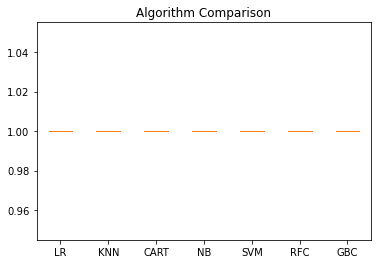

In [301]:
# Compare Algorithms
plt.boxplot(results, labels=names)
plt.title('Algorithm Comparison')
plt.show()

In [302]:
# Make predictions on validation dataset
model = SVC(gamma='auto')
model.fit(X_train_scale, y_train)
y_pred = model.predict(X_test_scale)

In [303]:
# Evaluate predictions
print(accuracy_score(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

1.0
[[ 984    0]
 [   0 1016]]
              precision    recall  f1-score   support

 non-potable       1.00      1.00      1.00       984
     potable       1.00      1.00      1.00      1016

    accuracy                           1.00      2000
   macro avg       1.00      1.00      1.00      2000
weighted avg       1.00      1.00      1.00      2000



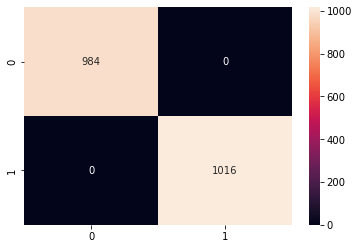

In [304]:
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='',);